In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn import tree

In [2]:
iris = pd.read_csv('D:\\24 - Machine_Learning\\download files\\iris.csv')
iris

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.isnull()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
iris.head(10)

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
iris.shape

(150, 5)

<AxesSubplot:>

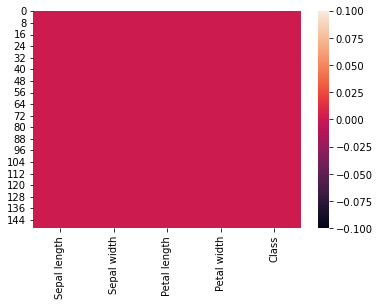

In [7]:
sns.heatmap(iris.isna())

In [8]:
iris.dtypes

Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class            object
dtype: object

In [9]:
iris.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


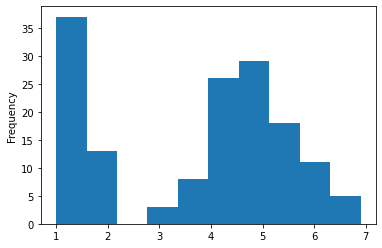

In [10]:
iris['Petal length'].plot.hist()
plt.show()

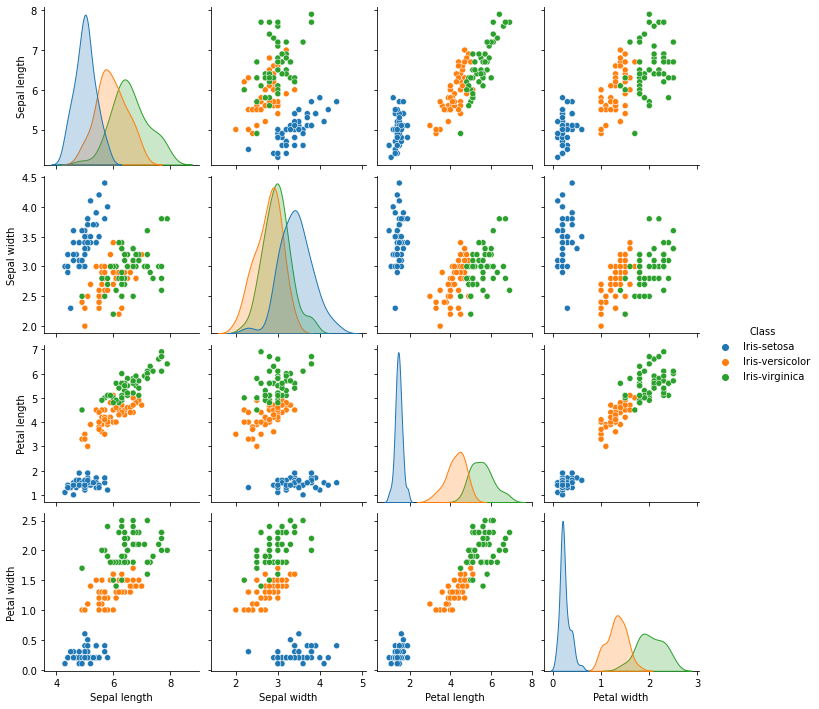

In [11]:
sns.pairplot(iris, hue='Class')
# pairplot describes the plot pairwise relationships in a dataset

In [12]:
features = iris[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']].values
classes = iris['Class'].values

In [13]:
(train_feat, test_feat, train_classes, test_classes) = train_test_split(features, classes, random_state=41)
# random state is to make sure the splitted is the same even if we split the dataset again and again

In [14]:
# TRAINING
# dectree = DecisionTreeClassifier(criterion = 'gini') - used to calculate gini
dectree = DecisionTreeClassifier(criterion = 'entropy') #- used to calculate entropy
dectree.fit(train_feat, train_classes)

DecisionTreeClassifier(criterion='entropy')

In [15]:
pred = dectree.predict(test_feat)
print("Accuracy:",metrics.accuracy_score(test_classes, pred))

Accuracy: 0.9210526315789473


In [16]:
print(classification_report(test_classes, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.77      0.87        13

       accuracy                           0.92        38
      macro avg       0.94      0.92      0.93        38
   weighted avg       0.93      0.92      0.92        38



In [17]:
# Predicting as single input feature
sepl = input("Sepal length: ")
sepw = input("Sepal width: ")
petl = input("Petal length: ")
petw = input("Petal width: ")
print(sepl, sepw, petl, petw)
pr = dectree.predict(np.column_stack([sepl, sepw, petl, petw]))
print("Predicted Species is: ",pr)

Sepal length: 5.5
Sepal width: 5.5
Petal length: 1.5
Petal width: 4.5
5.5 5.5 1.5 4.5
Predicted Species is:  ['Iris-setosa']


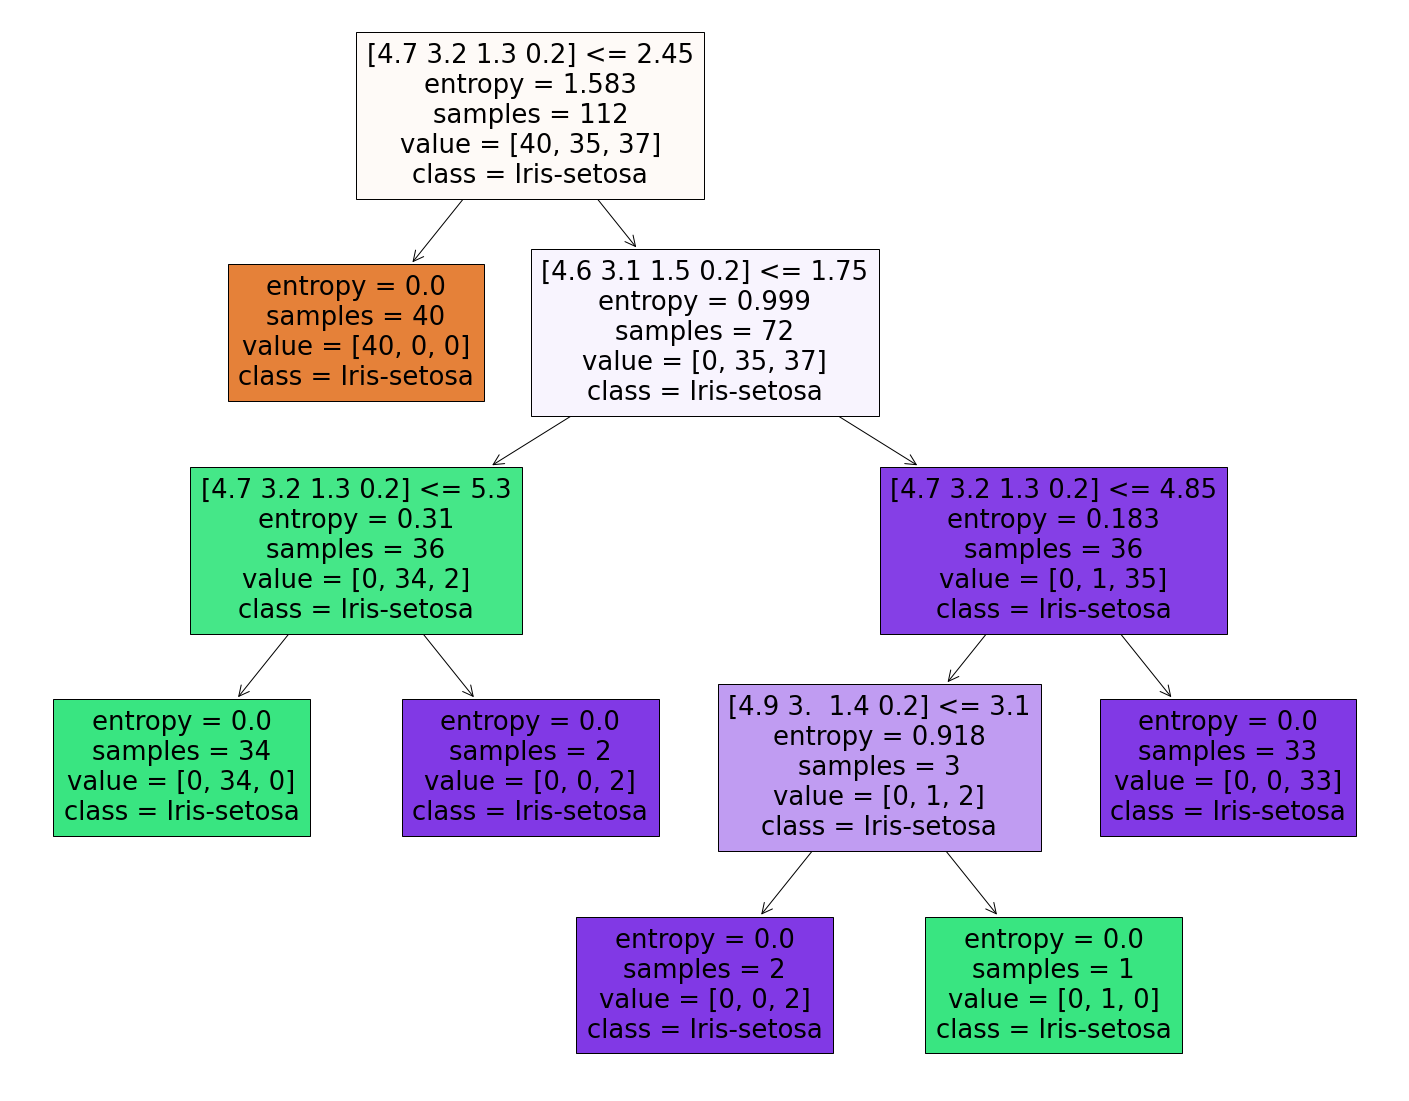

In [18]:
fig = plt.figure(figsize=(25, 20))
_= tree.plot_tree(dectree,
               feature_names = features,
               class_names = classes,
               filled = True)

In [19]:
text_representation = tree.export_text(dectree)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.30
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.30
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [20]:
import os
os.environ["PATH"]='C:/Program Files(x86)/Graphviz2.38/bin/'
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
feat_col=['Sepal length','Sepal width','Petal length','Petal width']
export_graphviz(dectree,out_file-dot_data,
                filled=True,rounded=True,
                 special_characters=True,feature_names=
                feat_col,class_names=['Setosa','Versicolor','Virginica']) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'